<a href="https://colab.research.google.com/github/chipojaya1/housing-prices-prediction/blob/main/house_prices_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

## Getting Started

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For preprocession and Feature Engineering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# For advanced gradient boosting models
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
sns.set(style='whitegrid')     # Set visual style for seaborn

## Data Loading and Inspection

In [4]:
ls

house-prices-advanced-regression-techniques.zip  sample_data/


In [8]:
# unzip the data
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/house_prices_data

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/house_prices_data/data_description.txt  
  inflating: /content/house_prices_data/sample_submission.csv  
  inflating: /content/house_prices_data/test.csv  
  inflating: /content/house_prices_data/train.csv  


In [10]:
#Load the data into train and test dataframes
# Training data
train_df = pd.read_csv('/content/house_prices_data/train.csv')
train_df.drop(train_df.columns[0],axis=1, inplace = True)

# Test data
test_df = pd.read_csv('/content/house_prices_data/test.csv')

In [11]:
# Getting to know the data
print(f"Train Data Shape: {train_df.shape}")
print()

train_df.info()
print()

train_df.head()

Train Data Shape: (1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 no

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Training data has 1460 observations and 80 features
- There are various data types, including integers, floats, and objects (strings) across the features.

In [12]:
# Summary statistics
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Displayed descriptive statistics for numerical features

*Interpretation*             
- Count: Most variables have 1460 observations, but some, like LotFrontage (1201) and MasVnrArea (1452), have missing values. I will have to handle missing data before analysis.

- Central Tendency: The mean and median (50%) values for many features are close, indicating relatively symmetric distributions. However, features like LotArea and SalePrice show larger differences between mean and median, suggesting potential skewness.

- Variation:    
  Variables like LotArea (std = 9981) and SalePrice (std = 79442) have high standard deviations relative to their means, indicating substantial variability.    
  Categorical or ordinal variables, such as OverallQual and OverallCond, show smaller standard deviations, reflecting more consistent values.    


In [13]:
#Key Variable Insights
key_var = [
    'SalePrice',        # Target variable
    'YearBuilt',        # Year the house was built
    'YearRemodAdd',     # Year the house was remodeled
    'LotArea',          # Lot area in square feet
    'OverallQual',      # Overall quality rating
    'OverallCond',      # Overall condition rating
    'MasVnrArea'        # Masonry veneer area
]

# Generate summary statistics for selected variables
train_df[key_var].describe()

,SalePrice,YearBuilt,YearRemodAdd,LotArea,OverallQual,OverallCond,MasVnrArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,180921.195890,1971.267808,1984.865753,10516.828082,6.099315,5.575342,103.685262
std,79442.502883,30.202904,20.645407,9981.264932,1.382997,1.112799,181.066207
min,34900.000000,1872.000000,1950.000000,1300.000000,1.000000,1.000000,0.000000
25%,129975.000000,1954.000000,1967.000000,7553.500000,5.000000,5.000000,0.000000
50%,163000.000000,1973.000000,1994.000000,9478.500000,6.000000,5.000000,0.000000
75%,214000.000000,2000.000000,2004.000000,11601.500000,7.000000,6.000000,166.000000
max,755000.000000,2010.000000,2010.000000,215245.000000,10.000000,9.000000,1600.000000


**Interpretation**

SalePrice:
Mean value of 180,921 usd, medianof 163,000usd and a high standard deviation and maximum value (755,000usd) indicating a right-skewed distribution, likely with some high-value outliers.
Maximum value is over 3 times the 75th percentile (214,000usd), indicating outliers that may need capping or further exploration.

YearBuilt and YearRemodAdd:
Median YearBuilt is 1973, and YearRemodAdd is 1994, showing that many houses have undergone updates. The range of YearBuilt (1872–2010) highlights the dataset's diversity in property age.

LotArea:
Ranges from 1300 to a massive 215,245, with a mean of 10,516. This wide range indicates significant differences in property sizes, likely including outliers. Maximum value (215,245) is far greater than the 75th percentile (11,601), suggesting significant outliers.

Overall Quality and Condition:
OverallQual and OverallCond are ordinal, ranging from 1–10 and 1–9, respectively. Median quality is 6, while condition is 5, suggesting average homes dominate the dataset.

MasVnrArea (Masonry Veneer Area):
Median = 0, indicating that many homes do not have masonry veneer. However, the maximum value of 1600 highlights a few homes with extensive masonry.

## Data Cleaning

**Missing Data**

In [14]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


- Identified columns with significant missing values:
  - PoolQC: 1453 missing
  - MiscFeature: 1406 missing
  - PoolQC: 1453 missing
  - MiscFeature: 1406 missing
  - Alley: 1369 missing
  - Fence: 1179 missing
  - MasVnrType: 872 missing
  - FireplaceQu: 690 missing
  - LotFrontage: 259 missing
- Other columns with fewer missing values.

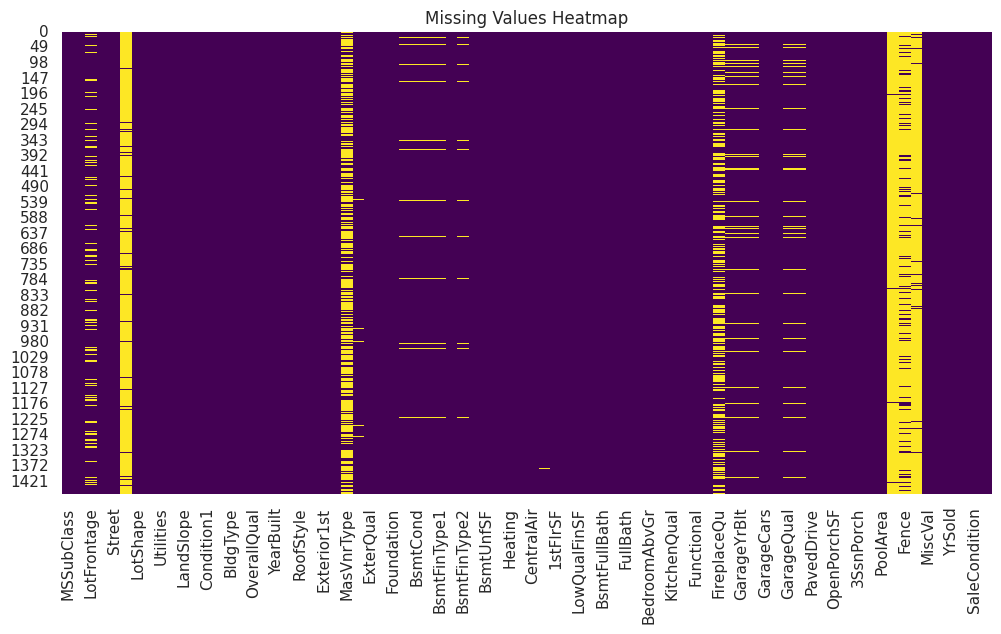

In [16]:
# Heatmap showing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [17]:
# Indexing missing values
missing_columns = missing_values[missing_values > 0].index.tolist()

# Display the first few rows of each column with missing values
for column in missing_columns:
    print(f"--- {column} ---")
    print(train_df[column].head(10))
    print()

--- LotFrontage ---
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

--- Alley ---
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

--- MasVnrType ---
0    BrkFace
1        NaN
2    BrkFace
3        NaN
4    BrkFace
5        NaN
6      Stone
7      Stone
8        NaN
9        NaN
Name: MasVnrType, dtype: object

--- MasVnrArea ---
0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

--- BsmtQual ---
0    Gd
1    Gd
2    Gd
3    TA
4    Gd
5    Gd
6    Ex
7    Gd
8    TA
9    TA
Name: BsmtQual, dtype: object

--- BsmtCond ---
0    TA
1    TA
2    TA
3    Gd
4    TA
5    TA
6    TA
7    TA
8    TA
9    TA
Name: BsmtCond, dtype: object

--- BsmtExposure ---
0    No
1    Gd
2    Mn
3    No
4    Av
5    No
6    Av
7    Mn
8    No
9    No
Name: BsmtE

**cleaning variables with numerical values**

In [18]:
# Dropping columns with too many missing values because it makes no sense to keep them
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=columns_to_drop, inplace=True)

In [20]:
train_df['MasVnrArea'].head(10)

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0
5,0.0
6,186.0
7,240.0
8,0.0
9,0.0


In [34]:
train_df['LotFrontage'].head(10)

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
5,85.0
6,75.0
7,NaN
8,51.0
9,50.0


In [35]:
# LotFrontage - replace with median value based on neighborhood
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [25]:
# MasVnrArea - replace missing with placeholder 0
train_df.fillna({'MasVnrArea': 0}, inplace=True)

**cleaning variables with categorical data**

In [23]:
train_df['MasVnrType'].head()

,MasVnrType
0,BrkFace
1,NaN
2,BrkFace
3,NaN
4,BrkFace


In [24]:
# MasVnrType - replace nan values with category 'none'
train_df.fillna({'MasVnrType': 'None'}, inplace=True)

In [30]:
train_df['FireplaceQu'].head()

,FireplaceQu
0,NaN
1,TA
2,TA
3,Gd
4,TA


In [31]:
# Fire place - replace replace nan values with category 'none'
train_df.fillna({'FireplaceQu': 'None'}, inplace=True)

In [32]:
# Garage-related features - replace nan values with category 'none'
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']
for feature in garage_features:
    train_df.fillna({feature: 'None'}, inplace=True)

In [36]:
# Basement Features - combine (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) and add none
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train_df[basement_features].head()
for feature in basement_features:
    train_df.fillna({feature: 'None'}, inplace=True)

In [29]:
train_df['Electrical'].head(10)

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr
5,SBrkr
6,SBrkr
7,SBrkr
8,FuseF
9,SBrkr


In [28]:
# Electrical - replace with mode
mode_value = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(mode_value)

In [37]:
# Checking for any remaining missing values
remaining_missing_values = train_df.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])

Series([], dtype: int64)


There is nomore missing data

- Dropped columns with too many missing values.
- Imputed placeholder values for relevant numercial features.
- Imputed placeholder category for relevant categorical features.

In [39]:
print("Number of rows and column after account for missing data:", train_df.shape)

Number of rows and column after account for missing data: (1460, 76)


In [42]:
# Display head of cleaned data
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,80.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


## Data Visualizations

**Sale Price**

In [43]:
# Check for non-positive prices
train_df[train_df['SalePrice'] <= 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no rows data with negative price values.

**Sale Price Distribution**

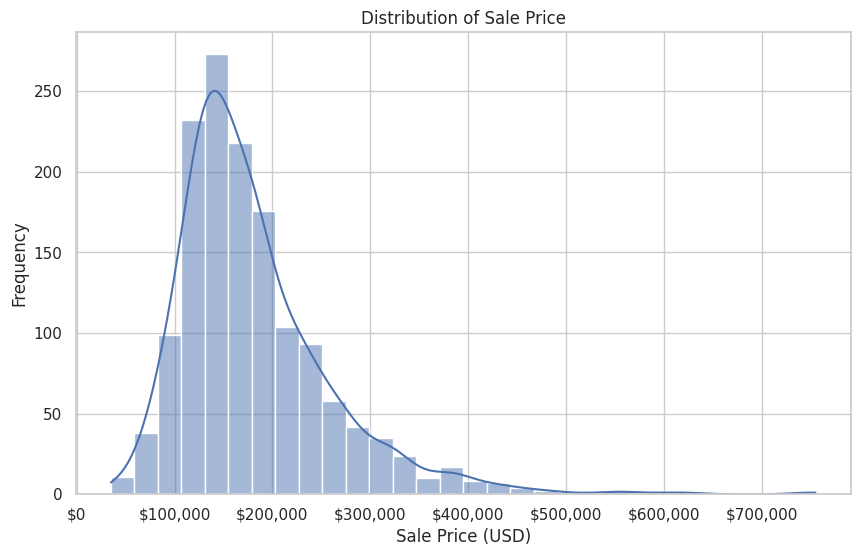

In [44]:
# Plotting Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**Key Variables**

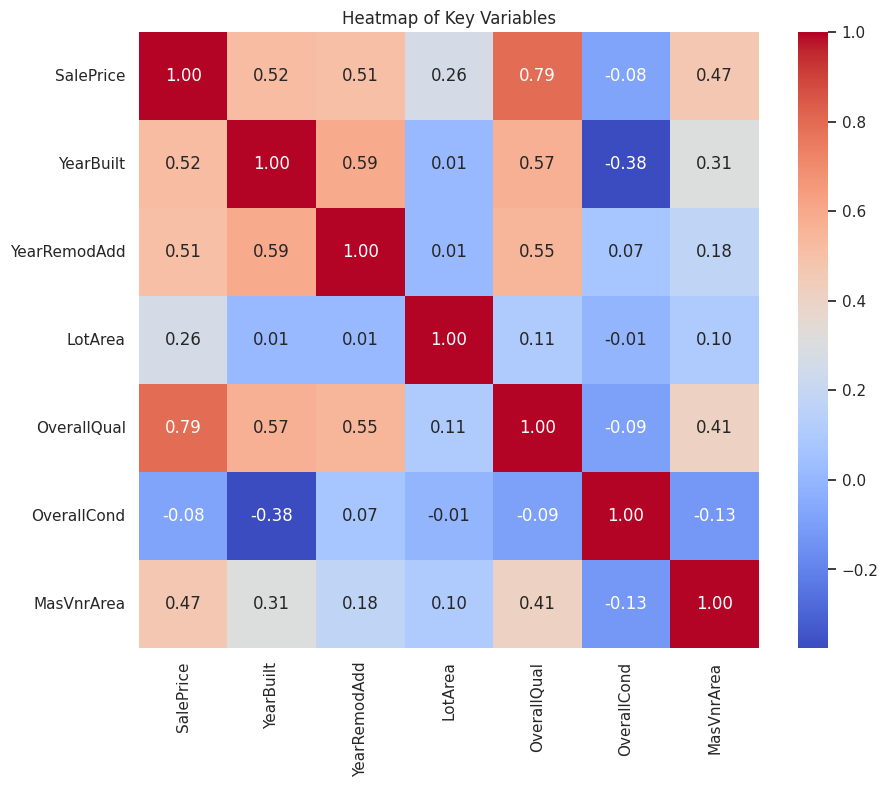

In [50]:
# Heatmap of my key variables
key_features = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea']
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[key_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Key Variables')
plt.show()

- OverallQual shows the strongest correlation with SalePrice (0.79), so higher quality homes cost more
- YearBuilt and YearRemodAdd both show moderate positive correlations with SalePrice (0.52 and 0.51 respectively), so either its a new property or been recently renovated
- MasVnrArea has a moderate positive correlation (0.47) with SalePrice, so homes with more masonry veneer area generally sell for higher prices
LotArea shows a weak positive correlation (0.26) with SalePrice, suggesting lot size has a limited impact on price1
- OverallCond shows a slight negative correlation (-0.08) with SalePrice, it is surprisingly to see that overall condition has minimal impact on price but there is a moderate negative correlation (-0.38) between OverallCond and YearBuilt, meaning newer homes tend to be in better condition as expected
- YearBuilt and YearRemodAdd show a moderate positive correlation (0.59), so newer homes are more likely to be remodeled

From this I can conclude that overall quality and age-related features are the strongest predictors of sale price, while condition and lot size have less influence than expected.

**YearBuilt vs SalePrice**

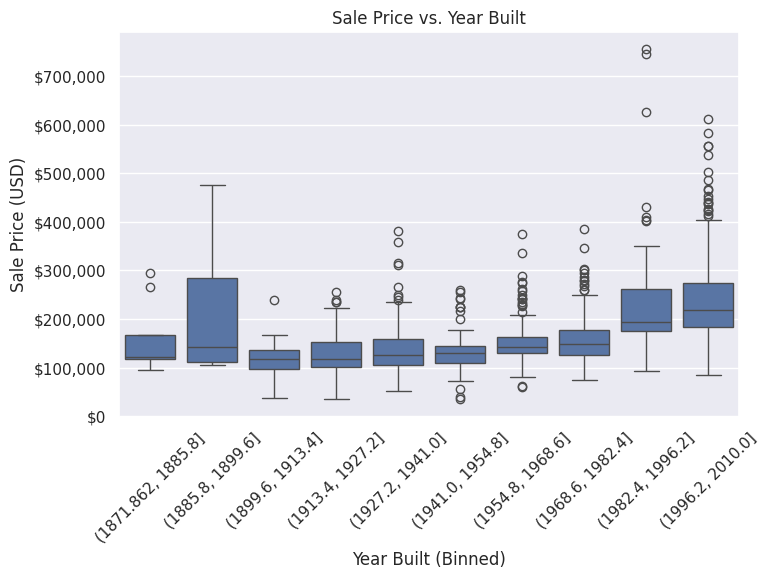

In [51]:
# Plotting Boxplot of SalePrice and YearBuilt
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(train_df['YearBuilt'], bins=10), y=train_df['SalePrice'])
plt.xticks(rotation=45)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built (Binned)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**SalePrice vs. Lot Area**

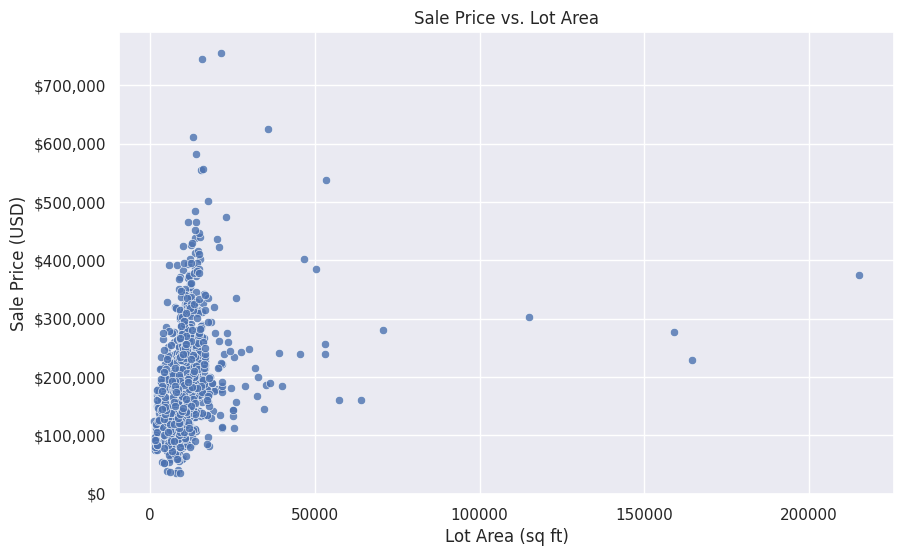

In [54]:
# Plotting Scatterplot of SalePrice and LotArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=train_df, alpha=0.8)
plt.title('Sale Price vs. Lot Area')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**Average Sale Price by Overall Quality**

In [55]:
# Bar plot of Overall Quality by Average Sale Price
avg_price_by_quality = train_df.groupby('OverallQual')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_quality,
              x='OverallQual',
              y='SalePrice',
              title='Average Sale Price by Overall Quality',
              labels={'OverallQual': 'Overall Quality Rating', 'SalePrice': 'Average Sale Price'},
              color='SalePrice',
              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

**MasVnrArea vs SalePrice**

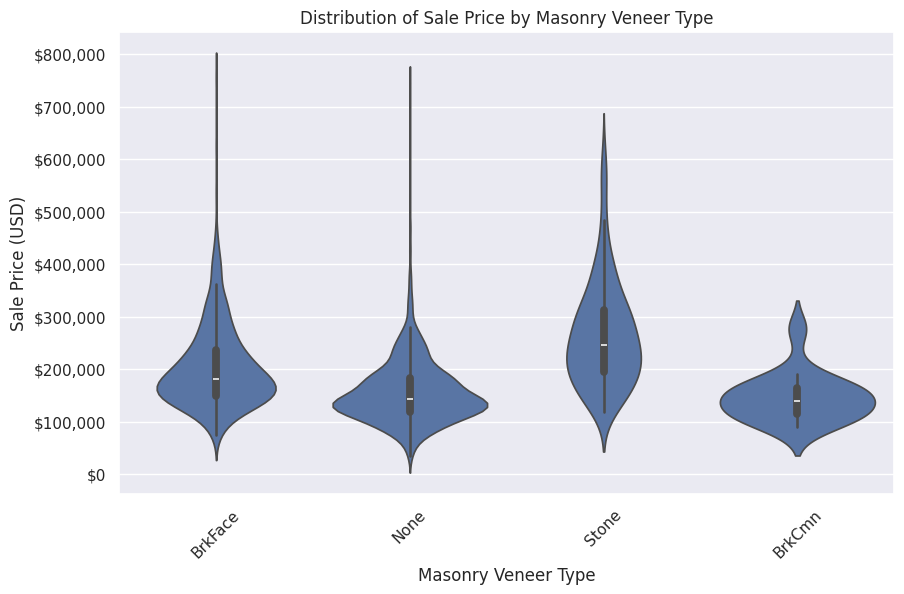

In [61]:
# Violin Plot of MasVnrType with SalePrice
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='MasVnrType', y='SalePrice')
plt.title('Distribution of Sale Price by Masonry Veneer Type')
plt.xlabel('Masonry Veneer Type')
plt.ylabel('Sale Price (USD)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()


### Other Interesting Variables

**SalePrice by Neighborhood**

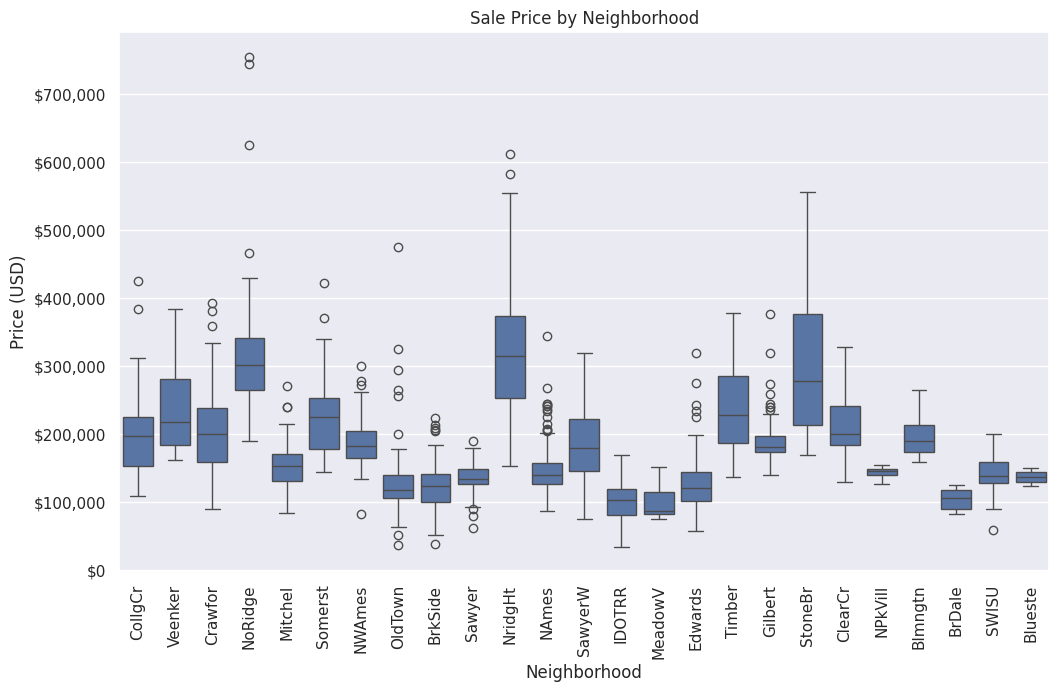

In [63]:
# Box plot of SalePrice by Neighborhood
plt.figure(figsize=(12, 7))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

**GrLivArea vs SalePrice**

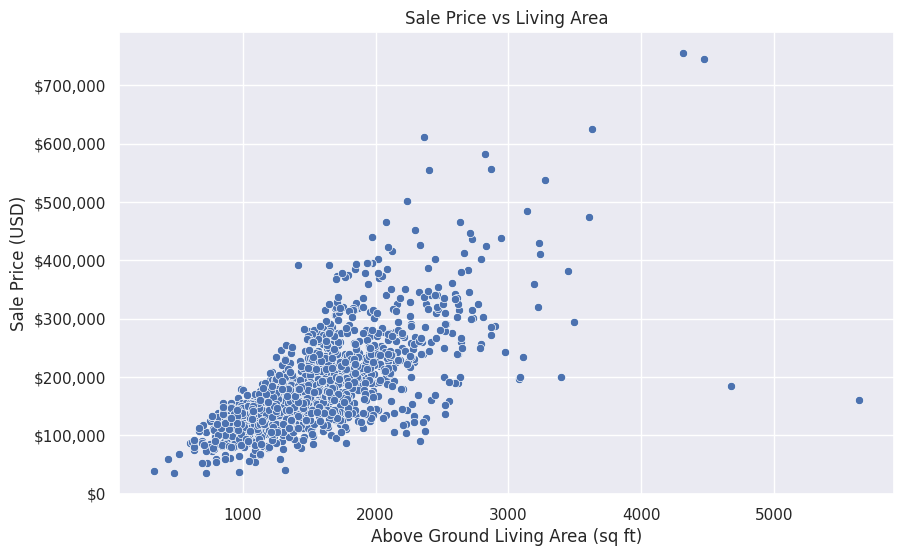

In [62]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.title('Sale Price vs Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

In [64]:
# Display unique value counts for each categorical feature
categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle']

for feature in categorical_features:
    print(f"--- {feature} ---")
    print(train_df[feature].value_counts())
    print("\n")

--- MSZoning ---
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


--- Neighborhood ---
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


--- BldgType ---
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


--- HouseStyle ---
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64




**Average Sale Price vs MSZoning**

In [67]:
# Counts of each zoning classification
property_counts = train_df['MSZoning'].value_counts().reset_index()
property_counts.columns = ['MSZoning', 'Count']

avg_price_by_zoning = train_df.groupby('MSZoning')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_zoning,
              x='MSZoning',
              y='SalePrice',
              title='Average Sale Price by Zoning Classification',
              labels={'MSZoning': 'Zoning Classification', 'SalePrice': 'Average Sale Price'},
              color='SalePrice',
              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

**Property Types**

In [68]:
ms_subclass_map = {
    20: '1-story 1946+',
    30: '1-story 1945-',
    40: '1-story SF',
    45: '2-story SF',
    50: '2-family',
    60: 'Duplex',
    70: 'Townhouse',
    80: 'SF with garage',
    90: 'Miscellaneous',
}

# Creating a new column for descriptive property types
train_df['PropertyType'] = train_df['MSSubClass'].map(ms_subclass_map)

# Count of each property type
property_counts = train_df['PropertyType'].value_counts().reset_index()
property_counts.columns = ['PropertyType', 'Count']

# Pie chart of property types
fig = go.Figure(data=[go.Pie(labels=property_counts['PropertyType'],
                               values=property_counts['Count'],
                               hole=.4)])  # To create a donut chart

fig.update_layout(title_text='Count by Property Type')
fig.show()

**SalePrice vs PropertyType**

In [83]:
# Histogram of Sale Prices by Property Type
fig = px.histogram(train_df,
                   x='SalePrice',
                   color='PropertyType',
                   nbins=50,
                   opacity=0.8,
                   title='Distribution of Sale Prices by Property Type',
                   labels={'SalePrice': 'Sale Price', 'count': 'Frequency'},
                   marginal='box')

# Edit layout
fig.update_layout(
    xaxis_title='Sale Price (USD)',
    yaxis_title='Frequency',
    legend_title='Property Type',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    ),
    barmode='overlay'
)

# Update x-axis to show currency format
fig.update_xaxes(tickprefix="$", tickformat=",.0f")
fig.show()

In [84]:
# Bar plot of average sale prices by each property type
avg_price_by_property_type = train_df.groupby('PropertyType')['SalePrice'].mean().reset_index()

fig = px.bar(avg_price_by_property_type,
             x='PropertyType',
             y='SalePrice',
             title='Average Sale Price by Property Type',
             labels={'PropertyType': 'Property Type', 'SalePrice': 'Average Sale Price'},
             color='SalePrice',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [85]:
# Correlation between property types and sale price
property_dummies = pd.get_dummies(train_df['PropertyType'], drop_first=True)
correlation_with_saleprice = pd.concat([train_df['SalePrice'], property_dummies], axis=1).corr()
correlation_with_saleprice['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
Duplex,0.377197
1-story 1946+,0.041274
1-story SF,-0.016366
SF with garage,-0.028646
Townhouse,-0.036883
2-story SF,-0.082912
Miscellaneous,-0.114655
2-family,-0.156692


**Features with numeric values**

In [90]:
# Correlation matrix for numeric columns only
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = train_df[numeric_columns].corr()
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

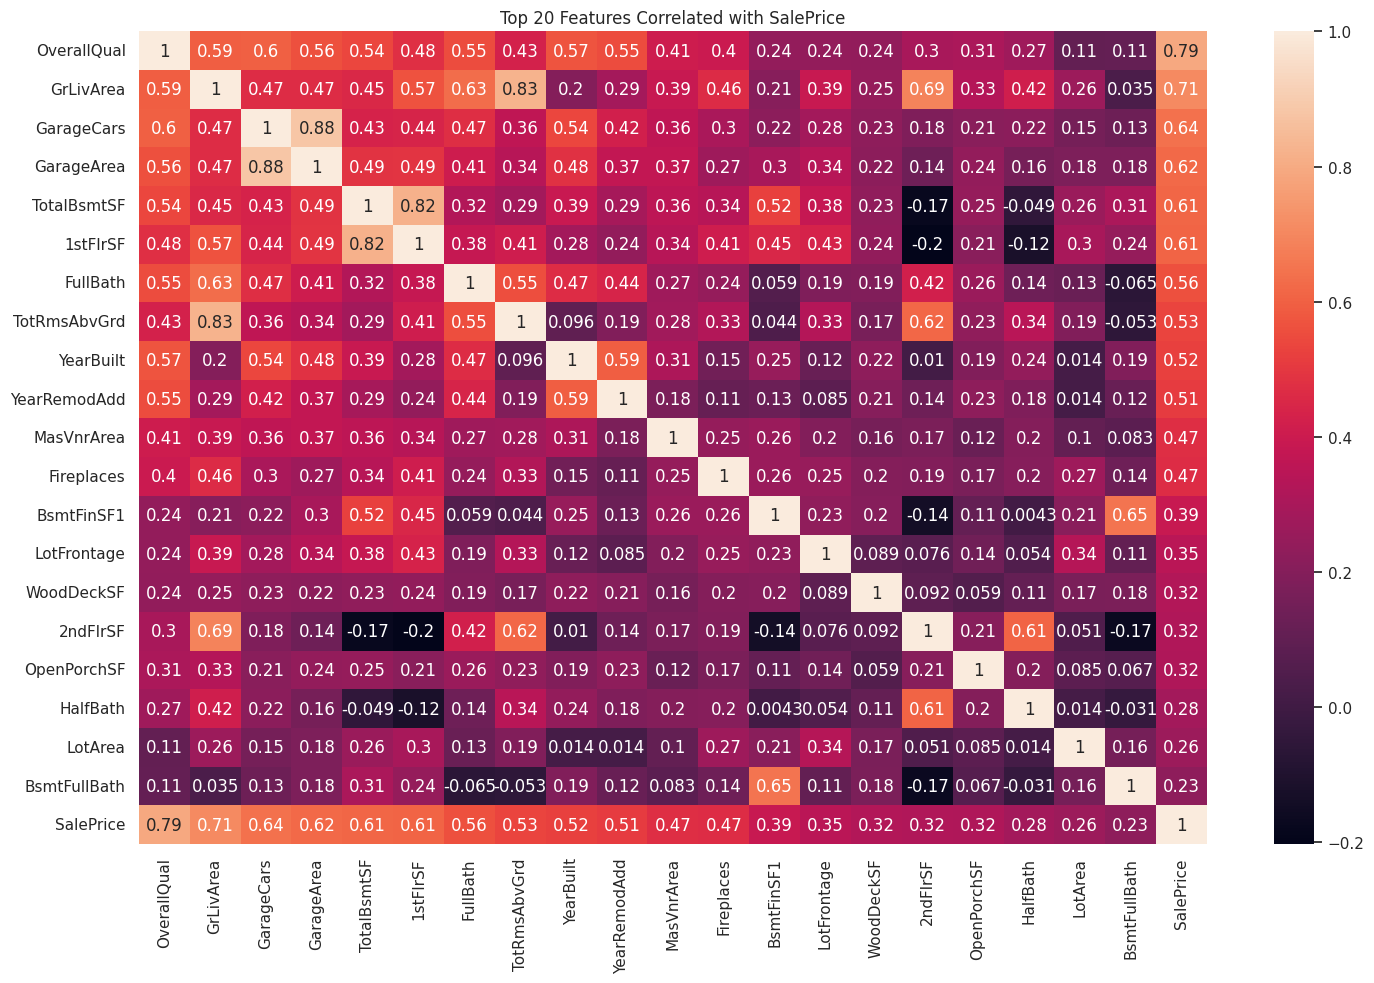

In [94]:
# Select top 20 features (excluding 'SalePrice' itself)
top_features = corr_with_saleprice[1:21].index.tolist()

# Create a new correlation matrix with only the top features
top_corr_matrix = train_df[top_features + ['SalePrice']].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(top_corr_matrix, annot=True)
plt.title('Top 20 Features Correlated with SalePrice')
plt.tight_layout()
plt.show()

## Data Processing

**Preparing the Data**

In [95]:
le = preprocessing.LabelEncoder()

df_encode = train_df.copy()

# Convert mixed type columns to strings
mixed_type_columns = ['MasVnrType', 'MasVnrArea', 'GarageYrBlt', 'PropertyType']
for col in mixed_type_columns:
    df_encode[col] = df_encode[col].astype(str)

# Encode all object columns and mixed type columns
columns_to_encode = df_encode.select_dtypes(include=['object']).columns.tolist() + mixed_type_columns
for col in columns_to_encode:
    df_encode[col] = le.fit_transform(df_encode[col].astype(str))

# Check for any remaining non-numeric columns
remaining_non_numeric = df_encode.select_dtypes(exclude=[np.number]).columns
print("Remaining non-numeric columns:", remaining_non_numeric)

Remaining non-numeric columns: Index([], dtype='object')


In [96]:
df_encode.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyType
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,208500,5
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,181500,1
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,223500,5
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,140000,8
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,250000,5


**Preparing Test Data**

In [97]:
# Display first few rows to get to know the dataset
# Getting to know the data
print(f"Test Data Shape: {test_df.shape}")
print()

test_df.info()
print()

test_df.head()

Test Data Shape: (1459, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [99]:
# Encode test data
test_encode = test_df.copy()
for col in columns_to_encode:
    if col in test_encode.columns:
        test_encode[col] = le.fit_transform(test_encode[col].astype(str))

# Verify with dispaying first observations
test_encode.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,NaN,3,3,0,...,120,0,NaN,MnPrv,NaN,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,NaN,0,3,0,...,0,0,NaN,NaN,Gar2,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,NaN,0,3,0,...,0,0,NaN,MnPrv,NaN,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,NaN,0,3,0,...,0,0,NaN,NaN,NaN,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,NaN,0,1,0,...,144,0,NaN,NaN,NaN,0,1,2010,8,4


In [126]:
# Compare feature names in train and test
print("Training features:", df_encode.columns.tolist())
print()
print("Testing features:", test_encode.columns.tolist())
print()

# Identify differences
print("Features in test but not in train:", set(df_encode.columns) - set(df_encode.columns))
print()
print("Features in train but not in test:", set(test_encode.columns) - set(test_encode.columns))
print()

print(df_encode.shape, test_encode.shape)

Training features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

I identified the differences between the training and test datasets:
- The training data has 77 columns
- The training data includes 'SalePrice' and 'PropertyType' which are not in the test dataset
- The test data has 80 columns
- The test data has an 'Id' column features like 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' which are not present in the training data

In [227]:
# Remove 'SalePrice' and 'PropertyType' from training data
X = df_encode.drop(['SalePrice', 'PropertyType'], axis=1)

# Remove 'Id' and extra features from test data
test_features = test_encode.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Ensure column order is the same
X = X[sorted(X.columns)]
test_features = test_features[sorted(test_features.columns)]

# Verify shapes
print("Training features shape:", X.shape)
print("Test features shape:", test_features.shape)


Training features shape: (1460, 75)
Test features shape: (1459, 75)


Training and test columns are now aligned

In [229]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, df_encode['SalePrice'], test_size=0.2, random_state=42)

# Prepare final test data
X_test_final = test_features.values

print("Training and Validation data shape:", X_train.shape, X_val.shape)
print("Test data shape:", X_test_final.shape)

Training and Validation data shape: (1168, 75) (292, 75)
Test data shape: (1459, 75)


After preprocessing total rows and columns are as follows:
- Training data shape: (1168, 75)
- Validation data shape: (292, 75)
- Test data shape: (1459, 80)

**Training my models for prediction**

In [232]:
# Train the models
# Ridge regression Model
ridgreg = Ridge()

# Train the model
ridgreg.fit(X_train, y_train)

print()

# Lasso regression Model
lasso = Lasso()

# Train the model
lasso.fit(X_train, y_train)

print()

# Random Forest Model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)

print()

# Elastic Net Model
enetreg = ElasticNet()

# Train the model
enetreg.fit(X_train, y_train)

print()

# XGBoost model
xgbreg = XGBRegressor(random_state=42, n_jobs=-1)

# Train the model
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

I trained several models fpr comparison purposes between different algorithms.
All six models were trained successfully without any errors

**Evaluating Performance**

In [236]:
# To evaluate accuracy for predictions on the training dataset
def evaluation_models(model, model_name):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mae = mean_absolute_error(y, predictions)
    print(f"{model_name} RMSE: ${rmse:.2f}")
    print(f"{model_name} R² Score: {r2:.4f}")
    print(f"{model_name} Mean Absolute Error: ${mae:.2f}")
    print()

    # To evaluate accuracy for predictions on the validation dataset
    predictions_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, predictions_val)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val, predictions_val)
    mae_val = mean_absolute_error(y_val, predictions_val)
    print(f"{model_name} Validation RMSE: ${rmse_val:.2f}")
    print(f"{model_name} Validation R² Score: {r2_val:.4f}")
    print(f"{model_name} Validation Mean Absolute Error: ${mae_val:.2f}")
    print()

models = {
    'Ridge Regression': ridgreg,
    'Lasso': lasso,
    'Random Forest': rf,
    'Elastic Net Regression': enetreg,
    'XGBoost': xgbreg
}

for name, model in models.items():
    evaluation_models(model, name)

Ridge Regression RMSE: $31547.36
Ridge Regression R² Score: 0.8422
Ridge Regression Mean Absolute Error: $19429.71

Ridge Regression Validation RMSE: $34764.12
Ridge Regression Validation R² Score: 0.8424
Ridge Regression Validation Mean Absolute Error: $21697.80

Lasso RMSE: $31538.01
Lasso R² Score: 0.8423
Lasso Mean Absolute Error: $19428.81

Lasso Validation RMSE: $34748.47
Lasso Validation R² Score: 0.8426
Lasso Validation Mean Absolute Error: $21721.28

Random Forest RMSE: $15904.87
Random Forest R² Score: 0.9599
Random Forest Mean Absolute Error: $8756.69

Random Forest Validation RMSE: $27965.45
Random Forest Validation R² Score: 0.8980
Random Forest Validation Mean Absolute Error: $17528.74

Elastic Net Regression RMSE: $32677.04
Elastic Net Regression R² Score: 0.8307
Elastic Net Regression Mean Absolute Error: $18975.31

Elastic Net Regression Validation RMSE: $35048.92
Elastic Net Regression Validation R² Score: 0.8398
Elastic Net Regression Validation Mean Absolute Error: 

**Interpretation**     
XGBoost:
- Best overall performance especially on the validation set
- The large difference between training and validation metrics suggests some overfitting

Ridge Regression:
- shows consistent performance between training and validation sets, indicating good generalization
- The R² scores suggest it explains about 84% of the variance in both sets

Lasso Regression:
- Very similar performance to Ridge Regression, with nearly identical metrics
- Multicollinearity might not be a significant issue in the dataset

Elastic Net Regression:
- Performs slightly worse than Ridge and Lasso
- Shows consistent performance between training and validation sets

Random Forest:
- Significantly better performance on the training set compared to the validation set
- Shows signs of underfitting
- Outperforms Ridge and Lasso on the validation set


In [239]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data for comparison
models = ['Ridge Regression', 'Lasso', 'Random Forest', 'Elastic Net Regression', 'XGBoost']
metrics = ['RMSE', 'R² Score', 'MAE']
training_data = [
    [31547.36, 0.8422, 19429.71],
    [31538.01, 0.8423, 19428.81],
    [15904.87, 0.9599, 8756.69],
    [32677.04, 0.8307, 18975.31],
    [12127.06, 0.9767, 4054.29]
]
validation_data = [
    [34764.12, 0.8424, 21697.80],
    [34748.47, 0.8426, 21721.28],
    [27965.45, 0.8980, 17528.74],
    [35048.92, 0.8398, 20377.16],
    [27064.08, 0.9045, 17940.22]
]

# Creating subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=metrics, vertical_spacing=0.1)

# Add traces for each metric
for i, metric in enumerate(metrics):
    fig.add_trace(go.Bar(name=f'Training {metric}', x=models, y=[data[i] for data in training_data], marker_color='purple'), row=i+1, col=1)
    fig.add_trace(go.Bar(name=f'Validation {metric}', x=models, y=[data[i] for data in validation_data], marker_color='skyblue'), row=i+1, col=1)

# Edit layout
fig.update_layout(height=1200, width=800, title_text="Model Performance Comparison", barmode='group')
fig.update_yaxes(title_text="RMSE ($)", row=1, col=1)
fig.update_yaxes(title_text="R² Score", row=2, col=1)
fig.update_yaxes(title_text="MAE ($)", row=3, col=1)
fig.show()


## Feature Engineering

**Cross Validation**

In [245]:
# Perform cross-validation
models = {
    "Ridge Regression": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=125, min_samples_leaf=125, max_samples=0.9, max_leaf_nodes=150, max_features=5, max_depth=35),
    "Elastic Net Regression": ElasticNet(),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} Cross-Validation Results:")
    print(f"Mean RMSE: ${rmse_scores.mean():.2f}")
    print(f"Standard Deviation: ${rmse_scores.std():.2f}")
    print()




Ridge Regression Cross-Validation Results:
Mean RMSE: $34331.26
Standard Deviation: $7564.66

Lasso Cross-Validation Results:
Mean RMSE: $34349.76
Standard Deviation: $7572.56

Random Forest Cross-Validation Results:
Mean RMSE: $53934.70
Standard Deviation: $5960.73

Elastic Net Regression Cross-Validation Results:
Mean RMSE: $34541.68
Standard Deviation: $7778.76

XGBoost Cross-Validation Results:
Mean RMSE: $28589.58
Standard Deviation: $3814.78



**Interpretation**   
- XGBoost significantly outperforms other models, with the lowest RMSE and smallest standard deviation, indicating superior predictive power and consistency
- The linear models (Elastic Net, Ridge, and Lasso) perform similarly, with high standard deviations, especially for linear models suggesting significant variability in model performance across different folds of the data
- Random Forest underperforms compared to other models, which is unexpected given its usual effectiveness in regression tasks.

For production use, weigh the trade-off between model complexity and performance. While XGBoost performs best, simpler models like Ridge or Lasso might be preferable if interpretability is important. I will focus on fine-tuning the XGBoost model from now becasue it shows the most promising results for accurate predictions

**Hyperparameter Tuning**

In [247]:
# Exploring a broader range of hyperparameters with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", np.sqrt(-random_search.best_score_))

Best parameters found:  {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best score found:  28166.007315286897


In [255]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}
Best RMSE: 27276.5355057885


**Insights from Fine-tuning**  
For the XGBoost, the optimal configuration suggests:
- A moderate number of trees (200)
- Relatively deep trees (max_depth: 8)
- A learning rate of 0.1, which is a good balance between learning speed and overfitting prevention
- Full feature utilization (colsample_bytree: 1.0)
- Some row subsampling (subsample: 0.6) to prevent overfitting

The fine-tuning of XGBoost using GridSearchCV improved the RMSE from 27,888.68 to 27,276.54, a 2.2% improvement. Overall, the gradient boosting approach of XGBoost seems most effective for this dataset, likely due to its ability to capture complex non-linear relationships between features and house prices.

## Testing the data

**Prediction on the Test Data using the best model**

In [248]:
# Predict SalePrice using the best model
best_model = random_search.best_estimator_
best_model_predictions = best_model.predict(X_test_final)

# Create a DataFrame for submission
predictions = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': best_model_predictions
})

# Save to CSV
submission.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'.")

Predictions saved to 'house_price_predictions.csv'.


In [250]:
print("Summary statistics of Predicted Sale Prices:")
print(submission['SalePrice'].describe())

Summary statistics of Predicted Sale Prices:
count      1459.000000
mean     179482.234375
std       72596.007812
min       53236.062500
25%      131661.320312
50%      159459.578125
75%      209808.710938
max      518197.625000
Name: SalePrice, dtype: float64


**Distribution of the predicted SalePrice**

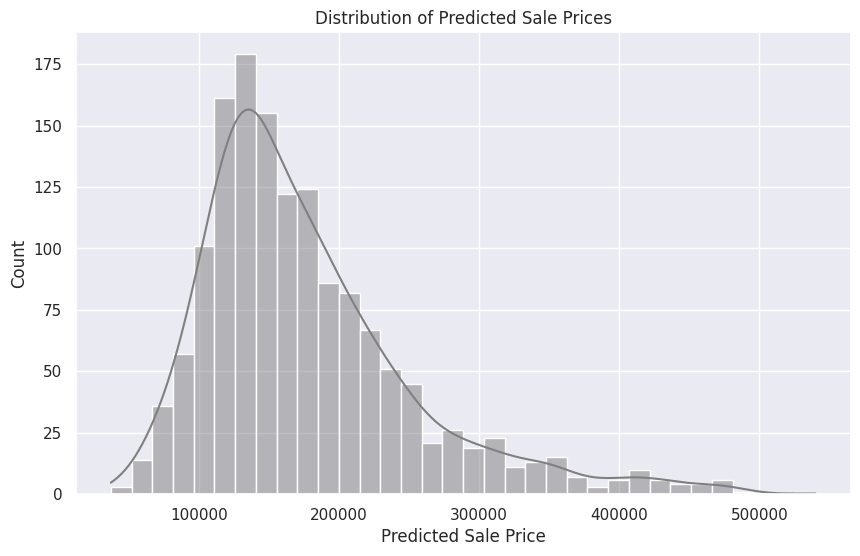

In [251]:
plt.figure(figsize=(10, 6))
sns.histplot(best_model_predictions, kde=True, color='gray')
plt.title('Distribution of Predicted Sale Prices')
plt.xlabel('Predicted Sale Price')
plt.show()


**Actual Price vs Predicted Price**

In [208]:
ls

house_price_predictions.csv                      house_prices_data/
house-prices-advanced-regression-techniques.zip  sample_data/


In [252]:
# Load the sample submission file
sample_submission = pd.read_csv('house_prices_data/sample_submission.csv')

# Merging the sample submission with your predictions
comparison_df = pd.merge(sample_submission, predictions, on='Id', suffixes=('_actual', '_predicted'))

rmse = np.sqrt(mean_squared_error(comparison_df['SalePrice_actual'], comparison_df['SalePrice_predicted']))
mae = mean_absolute_error(comparison_df['SalePrice_actual'], comparison_df['SalePrice_predicted'])
r2 = r2_score(comparison_df['SalePrice_actual'], comparison_df['SalePrice_predicted'])

print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

Root Mean Squared Error: $73182.50
Mean Absolute Error: $55376.71
R-squared Score: -18.6418


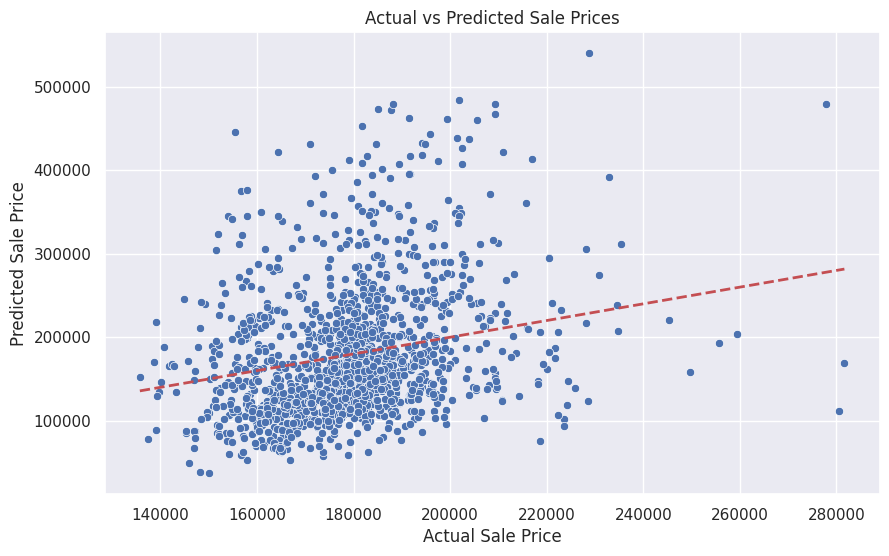

In [253]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalePrice_actual', y='SalePrice_predicted', data=comparison_df)
plt.plot([comparison_df['SalePrice_actual'].min(), comparison_df['SalePrice_actual'].max()],
         [comparison_df['SalePrice_actual'].min(), comparison_df['SalePrice_actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

**Residuals vs Predicted Price**

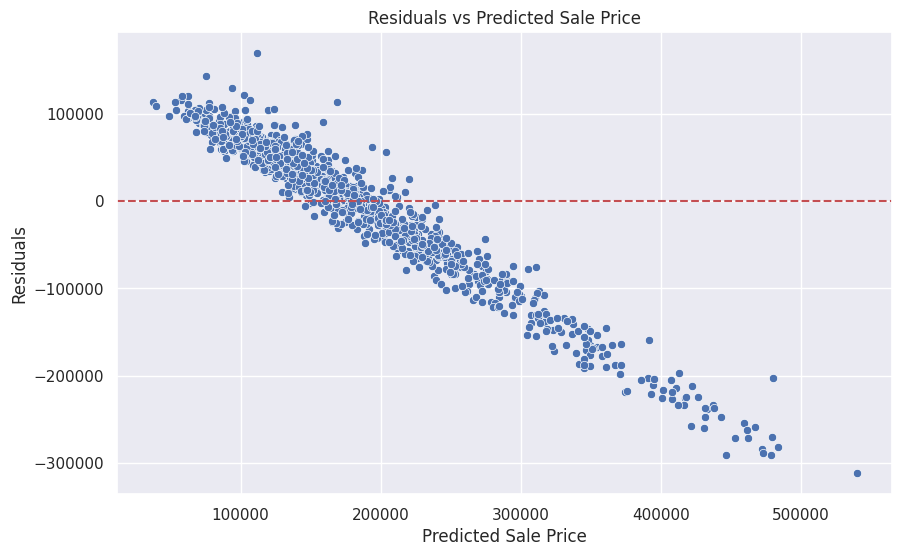

In [254]:
resid = comparison_df['SalePrice_actual'] - comparison_df['SalePrice_predicted']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SalePrice_predicted', y=resid, data=comparison_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.show()